Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the dataset:

In [4]:
df= pd.read_csv(r"C:\Users\Dell Pc\Downloads\metaverse_transactions_dataset.csv")
df.head(5)

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk
3,2022-06-15 09:20:04,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk
4,2022-02-18 14:35:30,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk


Dropping the couloumns that aren't of any use for the model

In [5]:
dropcl=['sending_address', 'receiving_address', 'timestamp']
df = df.drop(columns=dropcl)
df.head(5)


,hour_of_day,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,12,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk
1,19,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk
2,16,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk
3,9,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk
4,14,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk


### Scaling numerical coloumns 

We use MinMaxScaler to scale the numerical columns to a specified range. We are normalizing the values between 0 and 1, so that no paritcular feature dominates solely based on its magnitude thereby previnting bias in the model towards variables with larger scales

In [6]:
from sklearn.preprocessing import MinMaxScaler
numerical_coloumns= ['hour_of_day', 'amount', 'ip_prefix', 'login_frequency', 'session_duration']
scaler = MinMaxScaler()
df[numerical_coloumns]= scaler.fit_transform(df[numerical_coloumns])
df.head()

,hour_of_day,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,0.521739,0.511796,transfer,Europe,0.999078,0.285714,0.201439,focused,established,18.75,low_risk
1,0.826087,0.000000,purchase,South America,0.889289,0.571429,0.294964,focused,established,25.00,low_risk
2,0.695652,0.499754,purchase,Asia,1.000000,0.285714,0.388489,focused,established,31.25,low_risk
3,0.391304,0.193193,transfer,South America,0.889289,1.000000,0.654676,high_value,veteran,36.75,low_risk
4,0.608696,0.498066,sale,Africa,0.890167,0.714286,0.575540,high_value,veteran,62.50,moderate_risk


### One-hot-encoding of categorical columns

Using the get_dummies function we convert the categorical variables into indicator variables. This allows algorithms to interpret categorical data as numerical data, facilitating their inclusion in the model

In [7]:
import pandas as pd
categorical_features = ['transaction_type', 'location_region', 'purchase_pattern', 'age_group']

df= pd.get_dummies(df, columns=categorical_features)
df.head(5)

,hour_of_day,amount,ip_prefix,login_frequency,session_duration,risk_score,anomaly,transaction_type_phishing,transaction_type_purchase,transaction_type_sale,...,location_region_Asia,location_region_Europe,location_region_North America,location_region_South America,purchase_pattern_focused,purchase_pattern_high_value,purchase_pattern_random,age_group_established,age_group_new,age_group_veteran
0,0.521739,0.511796,0.999078,0.285714,0.201439,18.75,low_risk,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,0.826087,0.000000,0.889289,0.571429,0.294964,25.00,low_risk,False,True,False,...,False,False,False,True,True,False,False,True,False,False
2,0.695652,0.499754,1.000000,0.285714,0.388489,31.25,low_risk,False,True,False,...,True,False,False,False,True,False,False,True,False,False
3,0.391304,0.193193,0.889289,1.000000,0.654676,36.75,low_risk,False,False,False,...,False,False,False,True,False,True,False,False,False,True
4,0.608696,0.498066,0.890167,0.714286,0.575540,62.50,moderate_risk,False,False,True,...,False,False,False,False,False,True,False,False,False,True


# Logistic Regression Model:

The following logistic regression model predicts the anomaly label i.e whether there is high_risk, low_risk or moderate_risk associated with a transaction

**Description**:
* We drop the the coloumn 'anomaly' which is to be predicted along with the 'risk_score' colummn because including it as a feature might have introduced data leakage, affecting the model performance.



* 'train_test_split' generates an array of indices representing the length of the dataset then it shuffles the indices to ensure randomization, calculates teh size of the test set based on the specified test size, and then divides it into training and testing sets.

* 'CustomLogisticRegression' class has a constructor that first initializes the model with default values for learning_rate, no. of iterateions, weights and biases. Since 'anomaly' column had three classes, we use thte 'SoftMax' activation function to reprsent probabilities across multiplt classes. The fit mehtod trains the model using gradient descent, updating weights and bias to minimize losses

* 'One-Hot_encoding' converts the labels into encoded vectors, where each class is represented by a binary vector with a single 1 indicating the membership of that class e.g: (0,0,1), (1,0,0) etc. 'Predict' method predicts the class labels for data inputs by computing raw model outputs using matrix multiplication of input features with weights and adds biases, then applies the softmax function to obtain class probabilities and returns class with highest probability for each sample

In [14]:
from sklearn.metrics import classification_report

# Excluding target variable, and risk_score
X = df.drop(columns=['anomaly', 'risk_score']).values.astype(float)  
y = df['anomaly']

# Splitting the data into training and testing sets
def train_test_split_custom(X, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    test_size = int(len(X) * test_size)
    X_train, X_test = X[indices[:-test_size]], X[indices[-test_size:]]
    y_train, y_test = y[indices[:-test_size]], y[indices[-test_size:]]
    return X_train, X_test, y_train, y_test

class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, regularization=None, lambda_=0.01):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.regularization = regularization
        self.lambda_ = lambda_
        self.weights = None
        self.bias = None
        self.classes = None

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.classes = np.unique(y)
        self.num_classes = len(self.classes)
        self.weights = np.zeros((num_features, self.num_classes))
        self.bias = np.zeros(self.num_classes)

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.softmax(linear_model)

            if self.regularization == 'L2':
                dw = (1 / num_samples) * (np.dot(X.T, (y_predicted - self.one_hot_encode(y))) + self.lambda_ * self.weights)
                db = (1 / num_samples) * np.sum(y_predicted - self.one_hot_encode(y), axis=0)
            else:
                dw = (1 / num_samples) * np.dot(X.T, (y_predicted - self.one_hot_encode(y)))
                db = (1 / num_samples) * np.sum(y_predicted - self.one_hot_encode(y), axis=0)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.softmax(linear_model)
        return self.classes[np.argmax(y_predicted, axis=1)]

    def one_hot_encode(self, y):
        one_hot_y = np.zeros((len(y), self.num_classes))
        for i, cls in enumerate(self.classes):
            one_hot_y[:, i] = (y == cls)
        return one_hot_y.astype(int)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.2, random_state=42)
    
# Create an instance of CustomLogisticRegressionMultiClass
model = CustomLogisticRegression(learning_rate=0.09 , num_iterations=1500)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


               precision    recall  f1-score   support

    high_risk       1.00      1.00      1.00      1325
     low_risk       0.96      0.98      0.97     12672
moderate_risk       0.83      0.73      0.78      1723

     accuracy                           0.95     15720
    macro avg       0.93      0.90      0.92     15720
 weighted avg       0.95      0.95      0.95     15720



* This classification report shows the precision recall f1_score for each class. 
* **Precision:** How often a positive prediction is correct. For example, out of all the data points the model predicted as high-risk, how many were actually high-risk?
* **Recall:** How often the model identifies all positive cases. For example, out of all the data points that were actually high-risk, how many did the model predict as high-risk?
* **F1-Score:** A harmonic mean of precision and recall, and it’s useful when you care about both precision and recall.
* **Support:** The total number of data points in each class.

# Plots:

**Bar Charts:**
* we create bar charts to visualize the counts of correclty and incorrectly predicted labels for each class. Below is the figure with three subplots one for each class label
* we calculate the counts of the correct and incorrect labels for each class by iterating over the classes
* the blue bars show the correctly predicted labels whereas the orange bars how the incorrect labels.

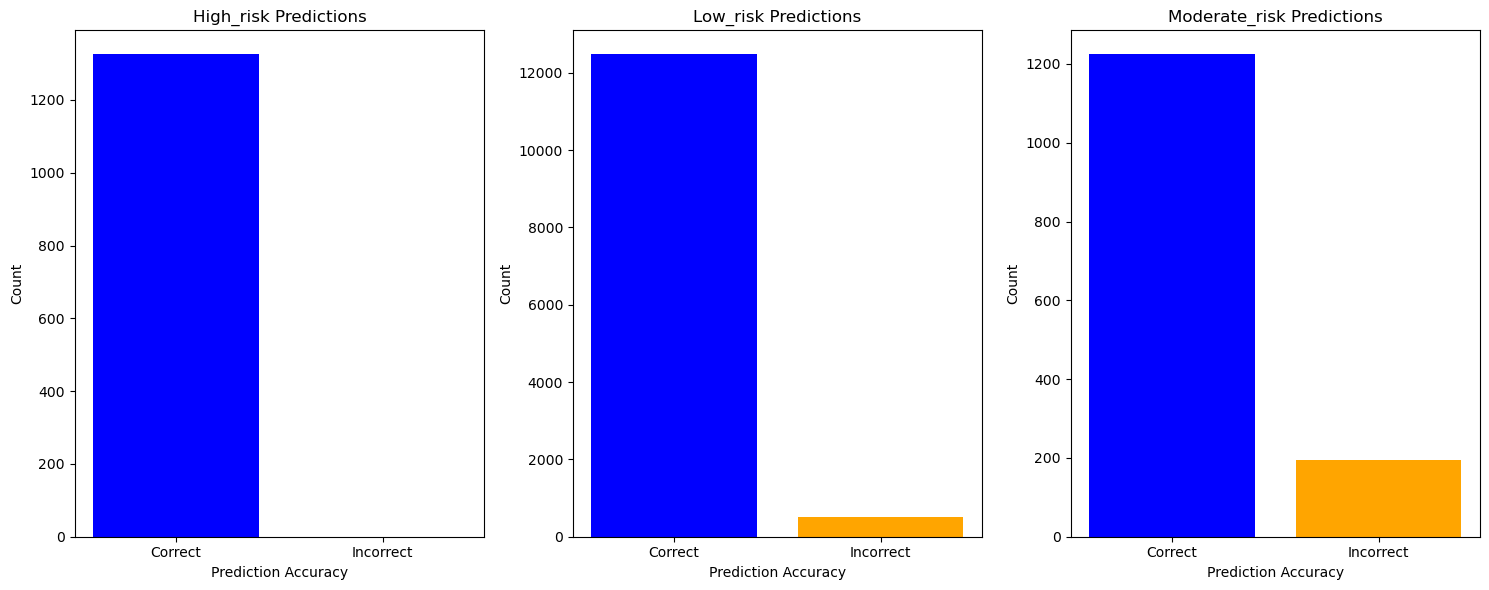

In [9]:
# Calculate correctly and incorrectly predicted labels counts for each class
classes = ['high_risk', 'low_risk', 'moderate_risk']
correct_counts = []
incorrect_counts = []
for cls in classes:
    correct_counts.append(np.sum((y_test == cls) & (y_pred == cls)))
    incorrect_counts.append(np.sum((y_test != cls) & (y_pred == cls)))
    
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
for i, cls in enumerate(classes):
    axs[i].bar(['Correct', 'Incorrect'], [correct_counts[i], incorrect_counts[i]], color=['blue', 'orange'])
    axs[i].set_title(f'{cls.capitalize()} Predictions')
    axs[i].set_xlabel('Prediction Accuracy')
    axs[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


* **High Risk:** the model correctly predicted high_risk associated with 1200 transactions, so it shows that the model is doing well in case of predicting high_risk transactions.
* **Low Risk:** the model predicted correcctly the low_risk labels for majority of the transactions, only 400 'low_risk' transactions were incorrecly labeled.
* **Moderate Risk:** the model is not doing very well incase of moderate_risk transactions as out of 1200, a total of around 200 were incorrecly labeled.
* Overall the model is performing well at predicting the high_risk and low_risk transactions.

**Heat Map:**
* we make use of the scikit-learn's 'confusion_matrix' function to compute the confusion matrix followed by seaborn's heatmap visualzation.
* from the heatmap we can see the ture-positives, false-positves, true-negatives and false-negatives for each of the label classes

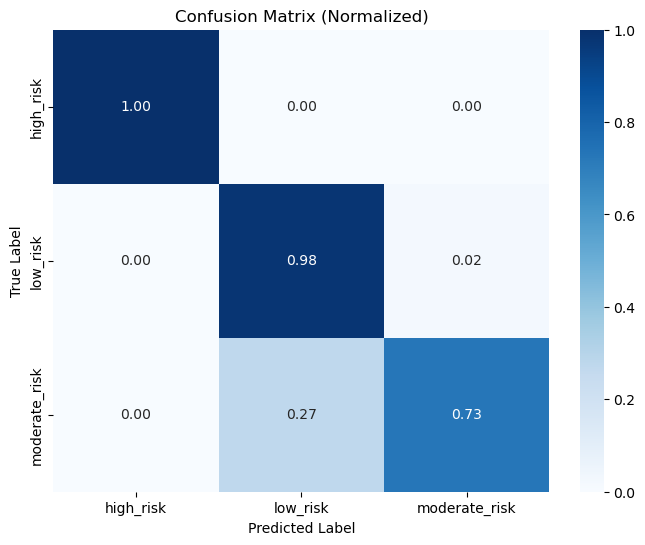

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Normalize confusion matrix
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_norm, annot=True, cmap='Blues', fmt='.2f', xticklabels=['high_risk', 'low_risk', 'moderate_risk'],
            yticklabels=['high_risk', 'low_risk', 'moderate_risk'])
plt.title('Confusion Matrix (Normalized)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


* A confusion matrix is a table that is used to evaluate the performance of a classification model. It shows the number of times that the model makes correct and incorrect predictions.
* The rows of the confusion matrix represent the actual labels of the data, and the columns represent the predicted labels. For example, the cell at the intersection of the "low_risk" row and the "low_risk" column shows the proportion of data points that were actually low-risk and were also predicted to be low-risk by the model.
* **High Risk:** 1.0 the high_risk intersection shows the true positves i.e the high_risk labels were correcly predicted
* **Low Risk:** 0.98 at the low risk intersection shows the 'true positives' for the low_risk label and 0.03 shows the 'false positves' for low_risk transactions which were incorrectly labeld as moderate risk.
* **Moderate Risk:** 0.73 at the moderate_risk intersection shows the 'true positives' for the moderate_risk transactions and 0.27 shows the 'false positives' which were incorrecly labeled as low_risk.
